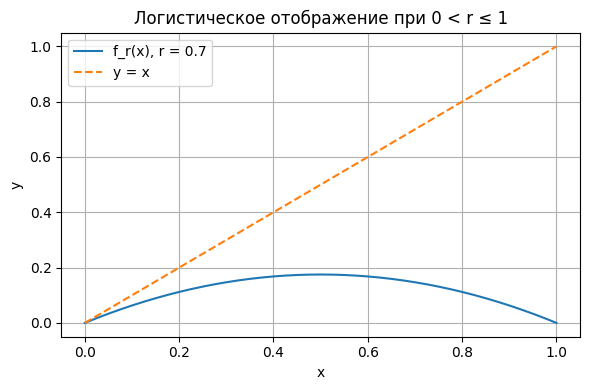

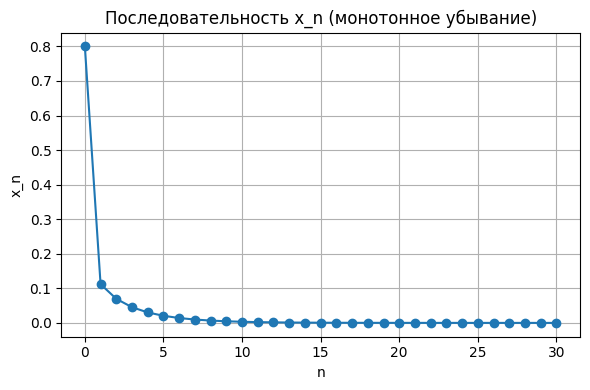

In [1]:
#Normal 2
import numpy as np
import matplotlib.pyplot as plt

# Логистическое отображение
# x_{n+1} = r x_n (1 - x_n)

def logistic(x, r):
    return r * x * (1 - x)


# ПАРАМЕТРЫ
r = 0.7     # 0 < r <= 1
x0 = 0.8    # 0 < x0 < 1
N = 30      # число итераций последовательности

#1) Строим последовательность {x_n}
x = np.zeros(N + 1)
x[0] = x0
for n in range(N):
    x[n + 1] = logistic(x[n], r)


#2) График y = f_r(x) и y = x на [0,1]
xs = np.linspace(0, 1, 400)

plt.figure(figsize=(6, 4))
plt.plot(xs, logistic(xs, r), label=f"f_r(x), r = {r}")
plt.plot(xs, xs, linestyle="--", label="y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Логистическое отображение при 0 < r ≤ 1")
plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.show()


#3) График последовательности x_n от n
plt.figure(figsize=(6, 4))
n_values = np.arange(N + 1)
plt.plot(n_values, x, marker="o")
plt.xlabel("n")
plt.ylabel("x_n")
plt.title("Последовательность x_n (монотонное убывание)")
plt.grid(True)
plt.tight_layout()
# plt.show()


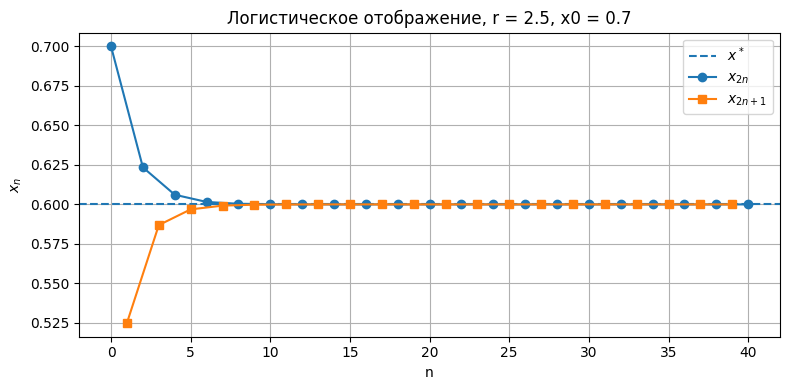

x_{2n} убывает?   True
x_{2n+1} возрастает? True


In [3]:
#Normal 3
import numpy as np
import matplotlib.pyplot as plt


def f(x, r):
#Логистическое отображение: f_r(x) = r * x * (1 - x).

    return r * x * (1 - x)


def plot_normal_subsequences(r=2.5, x0=0.7, N=40, skip_pairs=0):
    """
    Рисует график подпоследовательностей {x_{2n}} и {x_{2n+1}}
    для логистического отображения x_{n+1} = f_r(x_n).

    r         – параметр (2 < r < 3)
    x0        – начальное значение x_0
    N         – число итераций (будут точки x_0, ..., x_N)
    skip_pairs – сколько первых пар (x_{2n}, x_{2n+1}) пропустить
                 при анализе/отображении (для выброса транзиента)
    """
    # строим всю последовательность x_n
    x = np.empty(N + 1)
    x[0] = x0
    for n in range(N):
        x[n + 1] = f(x[n], r)

    # неподвижная точка x* = (r - 1)/r
    x_star = (r - 1) / r

    # индексы для подпоследовательностей
    start_even = 2 * skip_pairs
    start_odd = 2 * skip_pairs + 1

    idx_even = np.arange(start_even, N + 1, 2)
    idx_odd = np.arange(start_odd, N + 1, 2)

    x_even = x[idx_even]   # {x_{2n}}
    x_odd = x[idx_odd]     # {x_{2n+1}}

    #График
    plt.figure(figsize=(8, 4))

    # горизонтальная линия x*
    plt.axhline(x_star, linestyle="--", label=r"$x^*$")

    # подпоследовательности
    plt.plot(idx_even, x_even, "o-", label=r"$x_{2n}$")
    plt.plot(idx_odd, x_odd, "s-", label=r"$x_{2n+1}$")

    plt.xlabel("n")
    plt.ylabel(r"$x_n$")
    plt.title(fr"Логистическое отображение, r = {r}, x0 = {x0}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # проверим монотонность численно
    if len(x_even) > 1:
        print("x_{2n} убывает?  ",
              np.all(np.diff(x_even) < 0))
    if len(x_odd) > 1:
        print("x_{2n+1} возрастает?",
              np.all(np.diff(x_odd) > 0))


# Запуск: построить график для r ∈ (2, 3)
if __name__ == "__main__":
    plot_normal_subsequences(r=2.5, x0=0.7, N=40, skip_pairs=0)


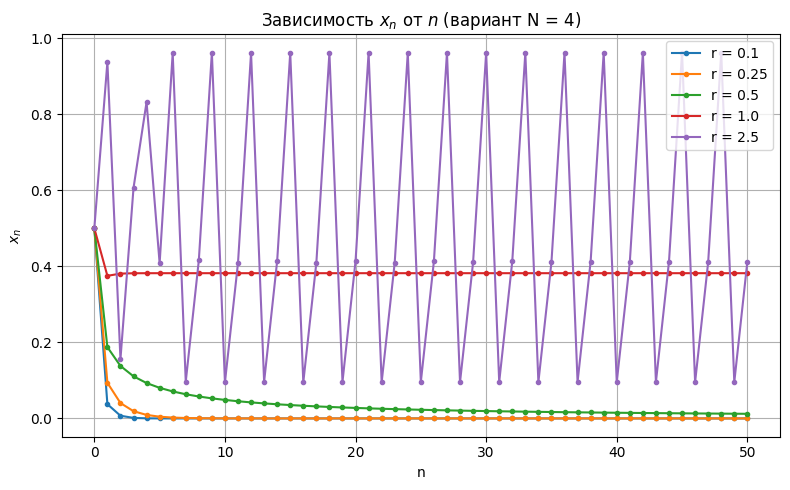

In [4]:
#Normal 4
import numpy as np
import matplotlib.pyplot as plt


# Отображение в варианте N = 4 :
# g(x) = r * x * (1 - x) * (2 - x)
def g(x, r):
    return r * x * (1 - x) * (2 - x)


# Построить последовательность (x_n)
def iterate(x0, r, N_steps):
    """
    Trả về mảng [x_0, x_1, ..., x_{N_steps}]
    với x_{n+1} = g(x_n).
    """
    xs = np.zeros(N_steps + 1)
    xs[0] = x0
    for n in range(N_steps):
        xs[n + 1] = g(xs[n], r)
    return xs


# Параметр
x0 = 0.5 # x_0 ∈ (0, 1)
N_steps = 50 # число итераций
# несколько значений r из интервала [0, 3*sqrt(3)/2]
r_values = [0.1, 0.25, 0.5, 1.0, 2.5]


# Построить график x_n как функции от n для каждого r
n = np.arange(N_steps + 1)
plt.figure(figsize=(8, 5))

for r in r_values:
    xs = iterate(x0, r, N_steps)
    plt.plot(n, xs, marker='.', linestyle='-', label=f"r = {r}")

plt.xlabel("n")
plt.ylabel(r"$x_n$")
plt.title(r"Зависимость $x_n$ от $n$ (вариант N = 4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()